## Step1. Import and Load Data

In [ ]:
from google.colab import drive

# Mount Google Drive (only if using files from Drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch

import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')

# Extract the text and label columns
texts = df["Text"].tolist()
labels = df["Label"].tolist()

# Check the data
print(f"Number of samples: {len(texts)}")
print(f"First text: {texts[0]}")
print(f"First label: {labels[0]}")

# Continue with your training pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define and train the pipeline
ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)

# Evaluate the AI vs Human classifier
y_pred = ai_human_pipeline.predict(X_test)
print("AI vs Human Classification Report:\n")
print(classification_report(y_test, y_pred))


# Define AI vs Human Labels
ai_human_labels = ["Human Generated", "AI Generated"]

# Function for AI vs Human Classification
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Integrated Function for Both Tasks
def classify_text(sentence):
    # AI vs Human classification
    ai_human_result = classify_ai_or_human(sentence)


    # Display results
    print(f"Text: {sentence}")
    print(f"AI or Human: {ai_human_result}")


# Step 4: Example Usage
input_sentence = input("Enter a sentence: ")
classify_text(input_sentence)


Number of samples: 500
First text: "I was feeling so happy about the little things today."
First label: 0
AI vs Human Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        53
           1       0.55      0.62      0.58        47

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100

Enter a sentence: i am happy
Text: i am happy
AI or Human: Human Generated


In [ ]:
input_sentence = input("Enter a sentence: ")
classify_text(input_sentence)

Enter a sentence: i am tired
Text: i am tired
AI or Human: Human Generated


In [ ]:
!pip install -q transformers
#!pip install -q datasets
!pip install -U datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
from datasets import load_dataset
emotions = load_dataset("emotion")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Step2. Preprocess Data

In [ ]:

from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
emotions_encoded["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_encoded["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
training_args = TrainingArguments(
    output_dir="results",
    num_train_epochs=8,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    weight_decay=0.01,
    eval_strategy="epoch",  # Changed from evaluation_strategy to eval_strategy
    save_strategy="epoch",  # Changed from "no" to "epoch" or "steps" based on your preference
    disable_tqdm=False
)

In [ ]:
pip install wandb

In [ ]:
!pip install -U transformers


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    logging_dir="./logs",
    report_to="none"
)

In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments with report_to set to "none"
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save model checkpoints and logs
    num_train_epochs=1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_dir="./logs",
    logging_steps=10,
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    save_strategy="epoch",
    report_to="none"  # Disable reporting to integrations like W&B
)

# Continue with your Trainer setup and training
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"]
)

# Start training
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.221100,0.166897,0.927500,0.928405


TrainOutput(global_step=500, training_loss=0.4333553216457367, metrics={'train_runtime': 249.399, 'train_samples_per_second': 64.154, 'train_steps_per_second': 2.005, 'total_flos': 715358872512000.0, 'train_loss': 0.4333553216457367, 'epoch': 1.0})

In [ ]:
results = trainer.evaluate()

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.16689711809158325,
 'test_accuracy': 0.9275,
 'test_f1': 0.9284054644352189,
 'test_runtime': 8.1253,
 'test_samples_per_second': 246.146,
 'test_steps_per_second': 7.754}

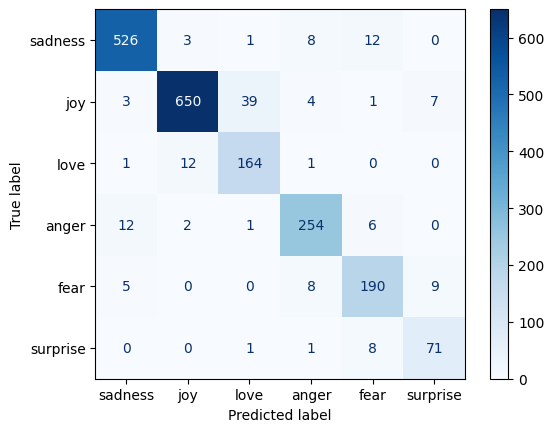

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate the confusion matrix
y_valid = np.array(emotions_encoded["validation"]["label"])
y_preds = np.argmax(preds_output.predictions, axis=1)
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
cm = confusion_matrix(y_valid, y_preds, labels=range(len(labels)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')


In [ ]:
model.save_pretrained('./model')
tokenizer.save_pretrained('./model')

('./model/tokenizer_config.json',
 './model/special_tokens_map.json',
 './model/vocab.txt',
 './model/added_tokens.json',
 './model/tokenizer.json')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define a directory to save the model and tokenizer
save_directory = "/content/drive/MyDrive/emotion_model"

# Save the model and tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model and tokenizer saved to /content/drive/MyDrive/emotion_model


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Define the directory where the model and tokenizer are saved
save_directory = "/content/drive/MyDrive/emotion_model"

# Load the saved model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained(save_directory)

# Load the model onto the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define a function for emotion prediction
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    new_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'stress']
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    return new_labels[predicted_class]

# Test on new text
test_text = "Her smile always makes me feel so loved"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")


Predicted Emotion: love


In [ ]:
# Test the model on a sample text
test_text = "I am very tired"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: sadness


In [ ]:
# Test the model on a sample text
test_text = "Dont feel sad"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: sadness


In [ ]:

# Test the model on a sample text
test_text = "Our ceremony was full of joy and hope and love"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: joy


In [ ]:

# Test the model on a sample text
test_text = "They had an argument and exchanged some angry words"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: anger


In [ ]:

# Test the model on a sample text
test_text = "All I want is to overcome my fear of heights, but I really don't know how"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: fear


In [ ]:

# Test the model on a sample text
test_text = "The organization was taken completely by surprise by the announcement"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: surprise


In [ ]:
# Step 3: Define Prediction Functions
# Function for Emotion Prediction
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    return labels[predicted_class]

# Function for AI vs Human Classification
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Integrated Function for Both Tasks
def classify_text_and_predict_emotion(sentence):
    # AI vs Human classification
    ai_human_result = classify_ai_or_human(sentence)
    print(f"Text: {sentence}")
    print(f"AI or Human: {ai_human_result}")

    # Emotion prediction
    if ai_human_result == "Human Generated":
      emotion_result = predict_emotion(sentence)
      print(f"Predicted Emotion: {emotion_result}")

    # Display results
    else:
        print("Emotion prediction skipped for AI-generated text.")

# Step 4: Example Usage
input_sentence = input("Enter a sentence: ")
classify_text_and_predict_emotion(input_sentence)

Enter a sentence: she is tracher
Text: she is tracher
AI or Human: AI Generated
Emotion prediction skipped for AI-generated text.


In [ ]:
input_sentence = input("Enter a sentence: ")
classify_text_and_predict_emotion(input_sentence)

Enter a sentence: She was overcome with emotion when she saw her grandmother again
Text: She was overcome with emotion when she saw her grandmother again
AI or Human: AI Generated
Emotion prediction skipped for AI-generated text.


In [ ]:
input_sentence = input("Enter a sentence: ")
classify_text_and_predict_emotion(input_sentence)

Enter a sentence:  I think that there may be a tiny bit of snobbishness in it, but it is a decent, human emotion
Text:  I think that there may be a tiny bit of snobbishness in it, but it is a decent, human emotion
AI or Human: AI Generated
Emotion prediction skipped for AI-generated text.


AI vs Human Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

Emotion Prediction Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.88      0.88      0.83         6
weighted avg       0.92      0.83      0.83         6



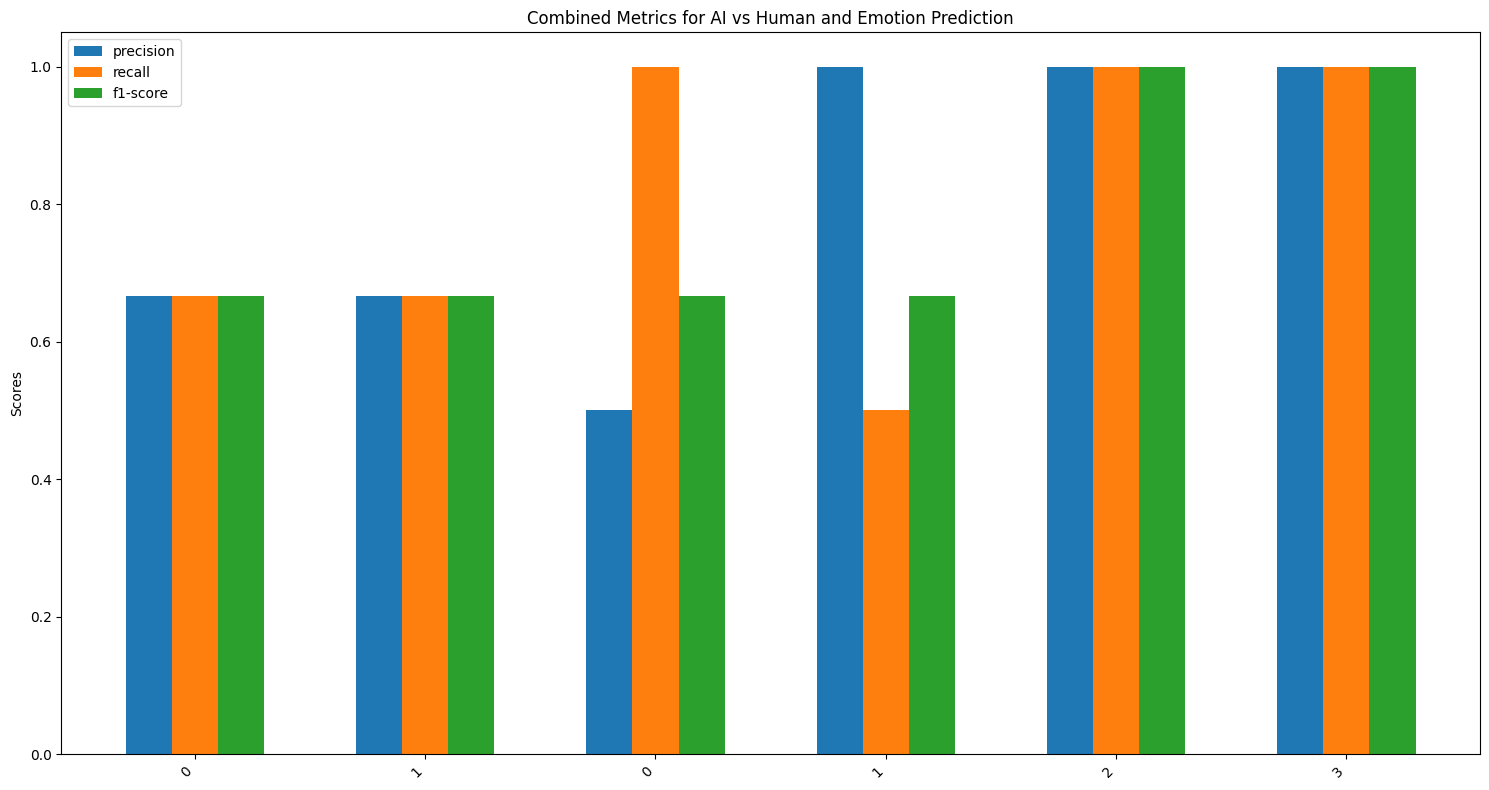

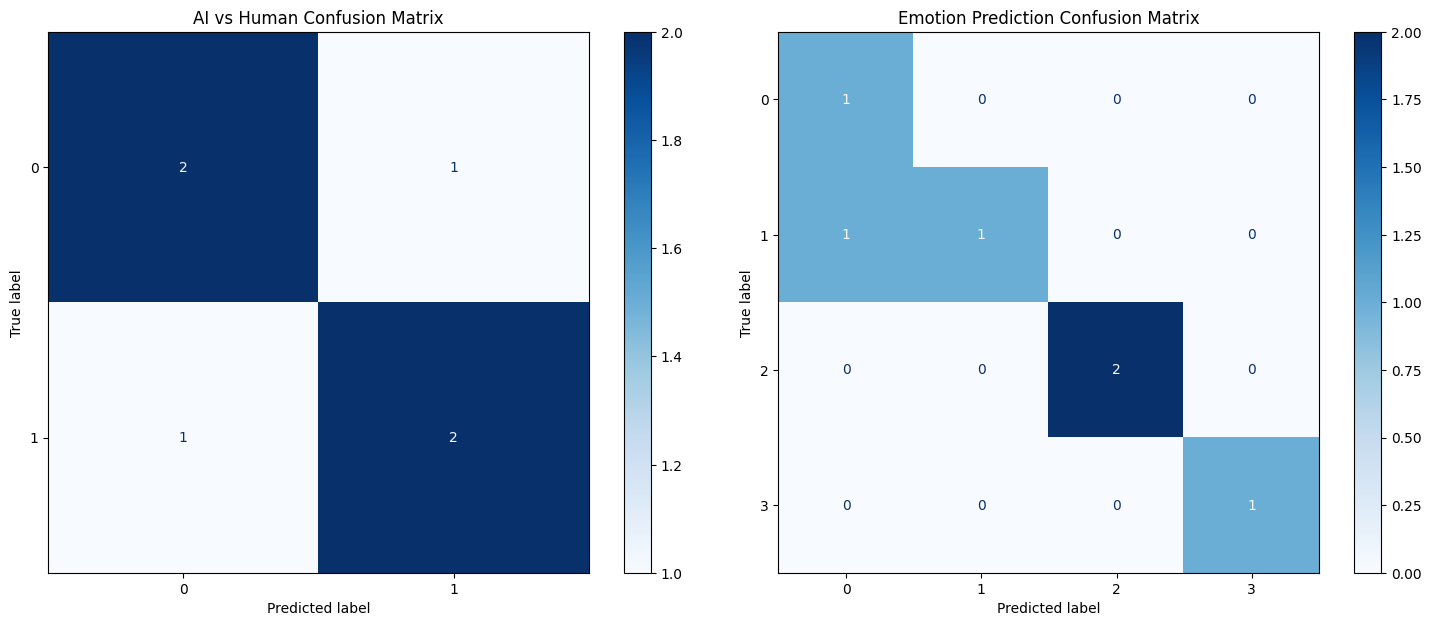

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluation Function
def evaluate_models(ai_human_labels_true, ai_human_labels_pred, emotion_labels_true, emotion_labels_pred):
    # AI vs Human Classification Metrics
    ai_human_report = classification_report(ai_human_labels_true, ai_human_labels_pred, output_dict=True)
    print("AI vs Human Classification Report:")
    print(classification_report(ai_human_labels_true, ai_human_labels_pred))

    # Emotion Prediction Metrics
    emotion_report = classification_report(emotion_labels_true, emotion_labels_pred, output_dict=True)
    print("Emotion Prediction Report:")
    print(classification_report(emotion_labels_true, emotion_labels_pred))

    # Combined Metrics Visualization
    metrics = ["precision", "recall", "f1-score"]
    ai_human_categories = list(ai_human_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    emotion_categories = list(emotion_report.keys())[:-3]

    combined_categories = ai_human_categories + emotion_categories
    combined_metrics = []

    for cat in ai_human_categories:
        combined_metrics.append([ai_human_report[cat][metric] for metric in metrics])

    for cat in emotion_categories:
        combined_metrics.append([emotion_report[cat][metric] for metric in metrics])

    combined_metrics = np.array(combined_metrics).T

    x = np.arange(len(combined_categories))
    width = 0.2

    fig, ax = plt.subplots(figsize=(15, 8))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, combined_metrics[i], width, label=metric)

    ax.set_xticks(x + width)
    ax.set_xticklabels(combined_categories, rotation=45, ha="right")
    ax.set_ylabel("Scores")
    ax.set_title("Combined Metrics for AI vs Human and Emotion Prediction")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # AI vs Human Confusion Matrix
    cm_ai_human = confusion_matrix(ai_human_labels_true, ai_human_labels_pred)
    ConfusionMatrixDisplay(cm_ai_human).plot(ax=axes[0], cmap="Blues")
    axes[0].set_title("AI vs Human Confusion Matrix")

    # Emotion Prediction Confusion Matrix
    cm_emotion = confusion_matrix(emotion_labels_true, emotion_labels_pred)
    ConfusionMatrixDisplay(cm_emotion).plot(ax=axes[1], cmap="Blues")
    axes[1].set_title("Emotion Prediction Confusion Matrix")

    plt.tight_layout()
    plt.show()

# Example Usage
def example_usage():
    # Replace these with your test labels and predictions
    ai_human_labels_true = [0, 1, 1, 0, 1, 0]  # Ground truth for AI vs Human
    ai_human_labels_pred = [0, 1, 0, 0, 1, 1]  # Predictions for AI vs Human

    emotion_labels_true = [2, 0, 1, 3, 1, 2]  # Ground truth for Emotion Prediction
    emotion_labels_pred = [2, 0, 1, 3, 0, 2]  # Predictions for Emotion Prediction

    evaluate_models(ai_human_labels_true, ai_human_labels_pred, emotion_labels_true, emotion_labels_pred)

# Call the example usage function
example_usage()


** AI RESPONSE STEP **

In [ ]:
pip install llama-cpp-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install llama-cpp-python --force-reinstall --no-cache-dir --extra-index-url https://jllllll.github.io/llama-cpp-python-cuBLAS-wheels/AVX2


Looking in indexes: https://pypi.org/simple, https://jllllll.github.io/llama-cpp-python-cuBLAS-wheels/AVX2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 146.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 140.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 213.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 156.0 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.9-cp311-cp311-linux_x86_64.whl size=4127074 sha256=f20dd2e8d789d46c0fe679620f3f7cdc5628e7ab785d63035afc1ee0d2ddd235
  Stored in directory: /tmp/pip-ephem-wheel-cache

In [ ]:
!wget https://huggingface.co/TheBloke/zephyr-7B-alpha-GGUF/resolve/main/zephyr-7b-alpha.Q4_K_M.gguf -O zephyr-7b.q4k.gguf


--2025-06-08 10:19:29--  https://huggingface.co/TheBloke/zephyr-7B-alpha-GGUF/resolve/main/zephyr-7b-alpha.Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.118, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/0e/2d/0e2d501c4480779936b52d3c1b7ca03a7da8fc6d121b0a1612099ee6100c0566/59877734fb4a22e81130b5d9b5155fbabdd5e338bba6a27391c93e77bd672004?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27zephyr-7b-alpha.Q4_K_M.gguf%3B+filename%3D%22zephyr-7b-alpha.Q4_K_M.gguf%22%3B&Expires=1749381569&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0OTM4MTU2OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy8wZS8yZC8wZTJkNTAxYzQ0ODA3Nzk5MzZiNTJkM2MxYjdjYTAzYTdkYThmYzZkMTIxYjBhMTYxMjA5OWVlNjEwMGMwNTY2LzU5ODc3NzM0ZmI0YTIyZTgxMTMwYjVkOWI1MTU1ZmJhYmRkNWUzMzhiYmE2YTI3MzkxYzkz

In [ ]:
from llama_cpp import Llama

# Load model (adjust path if you renamed or uploaded)
llm = Llama(model_path="zephyr-7b.q4k.gguf", n_ctx=2048, n_threads=4)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32   

In [ ]:
def chat_with_llama(user_input):
    prompt = (
        "<|system|>You are a compassionate AI who understands human emotions.<|end|>\n"
        f"<|user|>{user_input}<|end|>\n"
        "<|assistant|>"
    )

    output = llm(prompt, max_tokens=200, temperature=0.7, top_p=0.95)
    return output['choices'][0]['text'].strip()


In [ ]:
chat_with_llama("I hate to eat junk food.")

llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =   13311.76 ms /    45 tokens (  295.82 ms per token,     3.38 tokens per second)
llama_perf_context_print:        eval time =   39986.69 ms /    66 runs   (  605.86 ms per token,     1.65 tokens per second)
llama_perf_context_print:       total time =   53335.83 ms /   111 tokens


"I can't feel emotions, but i can understand that you may feel negatively about eating junk food. consuming foods that are high in sugar, salt, and unhealthy fats can lead to negative health consequences in the long run. it's always a good idea to choose healthier food options whenever possible."

In [ ]:
chat_with_llama("I'm feeling really anxious about my exams and can't sleep.")


Llama.generate: 28 prefix-match hit, remaining 26 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =    8434.04 ms /    26 tokens (  324.39 ms per token,     3.08 tokens per second)
llama_perf_context_print:        eval time =  122950.90 ms /   199 runs   (  617.84 ms per token,     1.62 tokens per second)
llama_perf_context_print:       total time =  131535.62 ms /   225 tokens


"I understand how you're feeling. Exam anxiety is quite common among students. Here are some tips that might help you:\n\n1. Practice relaxation techniques: Deep breathing exercises or meditation can help calm your mind and body.\n\n2. Limit caffeine and avoid alcohol: Caffeine can increase anxiety and make it harder to sleep, while alcohol can disrupt sleep and lead to more anxiety.\n\n3. Establish a sleep routine: Set a regular bedtime and wake-up time, and stick to them every day, even on weekends.\n\n4. Avoid screens before bed: The blue light from electronic devices can interfere with your body's production of the sleep hormone, melatonin.\n\n5. Exercise regularly: Physical activity can help reduce anxiety and promote better sleep.\n\n6. Eat a healthy diet: Avoid heavy meals close to bedtime, and try to eat a balanced diet with plenty of fruits"

In [ ]:
chat_with_llama("I really feel sad when pepole discourage me.")


Llama.generate: 28 prefix-match hit, remaining 22 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =    5039.42 ms /    22 tokens (  229.06 ms per token,     4.37 tokens per second)
llama_perf_context_print:        eval time =   72514.50 ms /   115 runs   (  630.56 ms per token,     1.59 tokens per second)
llama_perf_context_print:       total time =   77630.18 ms /   137 tokens


"I'm sorry to hear that you feel sad when people discourage you. Please know that this is a common feeling, and you're not alone. Remember that everyone experiences setbacks and criticism, but it doesn't define who you are or what you're capable of. Try to focus on the positive feedback and support that you've received, and use that as motivation to keep pushing forward. If you need someone to talk to, feel free to reach out to me any time. I'm here to listen and help you in any way possible."

In [ ]:
# Step 3: Define Prediction Functions
# Function for Emotion Prediction
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    return labels[predicted_class]

# Function for AI vs Human Classification
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Integrated Function for Both Tasks
def classify_text_and_predict_emotion(sentence):
    # AI vs Human classification
    ai_human_result = classify_ai_or_human(sentence)
    print(f"Text: {sentence}")
    print(f"AI or Human: {ai_human_result}")

    # Emotion prediction
    if ai_human_result == "Human Generated":
      emotion_result = predict_emotion(sentence)
      print(f"Predicted Emotion: {emotion_result}")

    # Display results
    else:
        print("Emotion prediction skipped for AI-generated text.")

# Step 4: Example Usage
input_sentence = input("Enter a sentence: ")
classify_text_and_predict_emotion(input_sentence)

Enter a sentence: i am tired
Text: i am tired
AI or Human: Human Generated
Predicted Emotion: sadness


In [ ]:
chat_with_llama("I am very tired.")

Llama.generate: 28 prefix-match hit, remaining 15 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =    6766.50 ms /    15 tokens (  451.10 ms per token,     2.22 tokens per second)
llama_perf_context_print:        eval time =   43533.61 ms /    67 runs   (  649.76 ms per token,     1.54 tokens per second)
llama_perf_context_print:       total time =   50340.41 ms /    82 tokens


"I understand that you are feeling tired. Can you elaborate on the reasons that are causing you to feel this way? Have you been experiencing a lack of sleep, or have you been overexerting yourself? If you'd like, I can provide you with some tips or resources to help you improve your sleep and energy levels."

In [ ]:
# Step 3: Define Prediction Functions
# Function for Emotion Prediction
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    return labels[predicted_class]

# Function for AI vs Human Classification
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Integrated Function for Both Tasks
def classify_text_and_predict_emotion(sentence):
    # AI vs Human classification
    ai_human_result = classify_ai_or_human(sentence)
    print(f"Text: {sentence}")
    print(f"AI or Human: {ai_human_result}")

    # Emotion prediction
    if ai_human_result == "Human Generated":
      emotion_result = predict_emotion(sentence)
      print(f"Predicted Emotion: {emotion_result}")

    # Display results
    else:
        print("Emotion prediction skipped for AI-generated text.")

# Step 4: Example Usage
input_sentence = input("Enter a sentence: ")
classify_text_and_predict_emotion(input_sentence)

chat_with_llama(input_sentence)

Enter a sentence: i am very tired
Text: i am very tired
AI or Human: Human Generated
Predicted Emotion: sadness


Llama.generate: 27 prefix-match hit, remaining 16 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =    3196.64 ms /    16 tokens (  199.79 ms per token,     5.01 tokens per second)
llama_perf_context_print:        eval time =   32474.90 ms /    55 runs   (  590.45 ms per token,     1.69 tokens per second)
llama_perf_context_print:       total time =   35702.10 ms /    71 tokens


"I'm sorry to hear that. Is there anything I can do to help you feel more rested? Perhaps I could suggest some tips for better sleep hygiene or recommend a soothing meditation or relaxation exercise. Is there anything specific you'd like to know?"

In [ ]:
# Install if not already installed
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your inputs
text1 = "I am very tired."
text2 = """I understand that you're feeling very tired. Do you need any help or support? Maybe I can assist you in finding a comfortable place to rest or suggest some relaxation techniques to help you feel more refreshed. Let me know if there's anything I can do for you."""

# Encode both texts
embeddings = model.encode([text1, text2], convert_to_tensor=True)

# Compute cosine similarity
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Display result
print(f"🧠 Semantic Similarity Score: {similarity_score:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 810.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.8 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🧠 Semantic Similarity Score: 0.5687


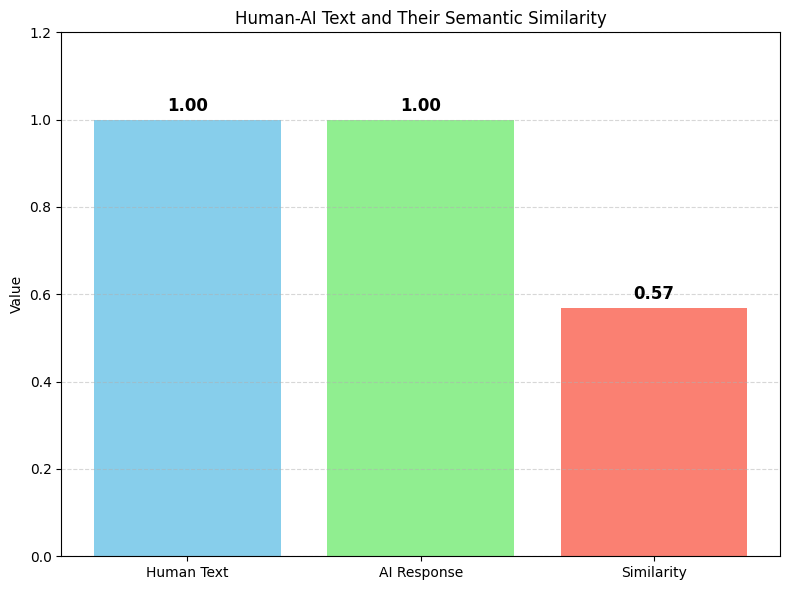

In [ ]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example pair
human_text = "I am very tired."
ai_text = """I understand that you're feeling very tired. Do you need any help or support? Maybe I can assist you in finding a comfortable place to rest or suggest some relaxation techniques to help you feel more refreshed. Let me know if there's anything I can do for you."""

# Encode texts and compute similarity
embeddings = model.encode([human_text, ai_text], convert_to_tensor=True)
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Values to plot
labels = ['Human Text', 'AI Response', 'Similarity']
values = [1.0, 1.0, similarity_score]  # Set 1.0 for texts (just to show them equally), real info in similarity

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02,
             f"{val:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1.2)
plt.title("Human-AI Text and Their Semantic Similarity")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Define the directory where the model and tokenizer are saved
save_directory = "/content/drive/MyDrive/emotion_model"

# Load the saved model and tokenizer into distinct variables
emotion_model = AutoModelForSequenceClassification.from_pretrained(save_directory)
emotion_tokenizer = AutoTokenizer.from_pretrained(save_directory)

# Load the model onto the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
emotion_model.to(device)

# Define emotion labels
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Function for Emotion Prediction
def predict_emotion(text):
    inputs = emotion_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        logits = emotion_model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    return labels[predicted_class]

In [ ]:
chat_with_llama("I'm feeling really anxious about my exams and can't sleep.")

Llama.generate: 27 prefix-match hit, remaining 27 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =   17635.50 ms /    27 tokens (  653.17 ms per token,     1.53 tokens per second)
llama_perf_context_print:        eval time =  149167.03 ms /   198 runs   (  753.37 ms per token,     1.33 tokens per second)
llama_perf_context_print:       total time =  166967.44 ms /   225 tokens


"I'm sorry to hear that. Anxiety can be a challenging and overwhelming feeling. Here are some tips to help you manage your anxiety:\n\n1. Practice relaxation techniques like deep breathing, progressive muscle relaxation, or meditation.\n\n2. Write down your thoughts and concerns to help identify and address the root cause of your anxiety.\n\n3. Create a study plan that allows you to tackle one topic at a time, and avoid cramming.\n\n4. Avoid caffeine and other stimulants that can increase anxiety levels.\n\n5. Get regular exercise, as it helps to reduce stress and promote relaxation.\n\n6. Try to get a good night's sleep, and avoid using electronics before bedtime.\n\n7. Talk to a professional if your anxiety persists and affects your daily life.\n\nRemember, you're not alone, and there are resources available to help you cope with your anxiety."

In [ ]:
# Install if not already installed
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your inputs
text1 = "I'm feeling really anxious about my exams and can't sleep."
text2 = """Anxiety can be overwhelming, but there are several techniques you can try to calm your mind and promote better sleep. One technique that has been shown to be helpful is called progressive muscle relaxation. This involves tensing and then releasing each muscle group in your body, starting from your feet and working your way up to your head. This can help to release tension and promote relaxation. Another technique that may help is called deep breathing. Sit in a comfortable position and take deep, slow breaths, inhaling for a count of four and exhaling for a count of six. This can help to slow your heart rate and promote a calmer state. Additionally, you might want to try creating a relaxing bedtime routine. This could include a warm bath, reading a book, or listening to calming music. Finally, it might be helpful to seek support from a mental health professional. They can help you to develop coping strategies and provide support during."""

# Encode both texts
embeddings = model.encode([text1, text2], convert_to_tensor=True)

# Compute cosine similarity
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Display result
print(f"🧠 Semantic Similarity Score: {similarity_score:.4f}")

🧠 Semantic Similarity Score: 0.5949


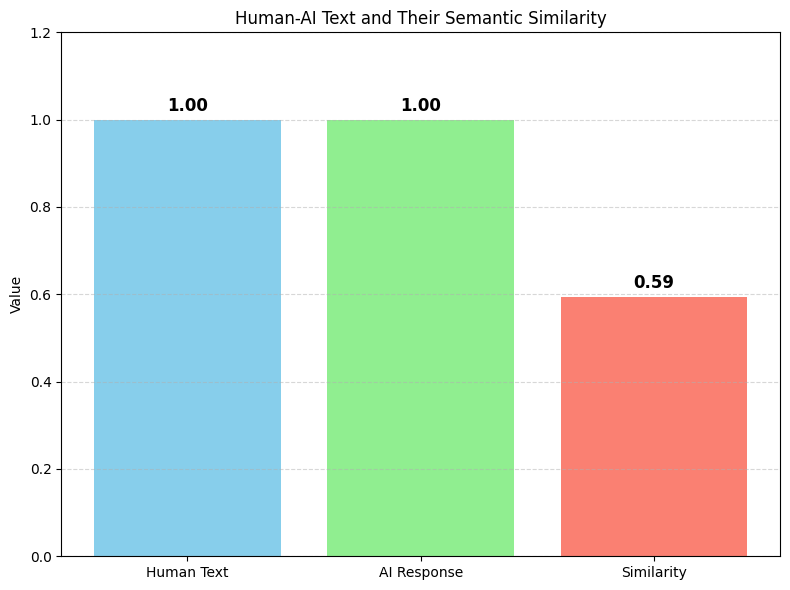

In [ ]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example pair
human_text = "I'm feeling really anxious about my exams and can't sleep."
ai_text = """Anxiety can be overwhelming, but there are several techniques you can try to calm your mind and promote better sleep. One technique that has been shown to be helpful is called progressive muscle relaxation. This involves tensing and then releasing each muscle group in your body, starting from your feet and working your way up to your head. This can help to release tension and promote relaxation. Another technique that may help is called deep breathing. Sit in a comfortable position and take deep, slow breaths, inhaling for a count of four and exhaling for a count of six. This can help to slow your heart rate and promote a calmer state. Additionally, you might want to try creating a relaxing bedtime routine. This could include a warm bath, reading a book, or listening to calming music. Finally, it might be helpful to seek support from a mental health professional. They can help you to develop coping strategies and provide support during."""

# Encode texts and compute similarity
embeddings = model.encode([human_text, ai_text], convert_to_tensor=True)
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Values to plot
labels = ['Human Text', 'AI Response', 'Similarity']
values = [1.0, 1.0, similarity_score]  # Set 1.0 for texts (just to show them equally), real info in similarity

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02,
             f"{val:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1.2)
plt.title("Human-AI Text and Their Semantic Similarity")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Install if not already installed
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your inputs
text1 = "I'm feeling really anxious about my exams and can't sleep."
text2 = """That totally makes sense—exams can be incredibly stressful. I'm really glad you reached out.

Let’s talk through it a bit. What's been making you most anxious—are you feeling unprepared, overwhelmed, or is it more about pressure to do well?

And for sleep, have you been tossing and turning with racing thoughts, or is it more just a general sense of restlessness? We can definitely figure out some ways to help ease your mind tonight.."""

# Encode both texts
embeddings = model.encode([text1, text2], convert_to_tensor=True)

# Compute cosine similarity
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Display result
print(f"🧠 Semantic Similarity Score: {similarity_score:.4f}")

🧠 Semantic Similarity Score: 0.7969


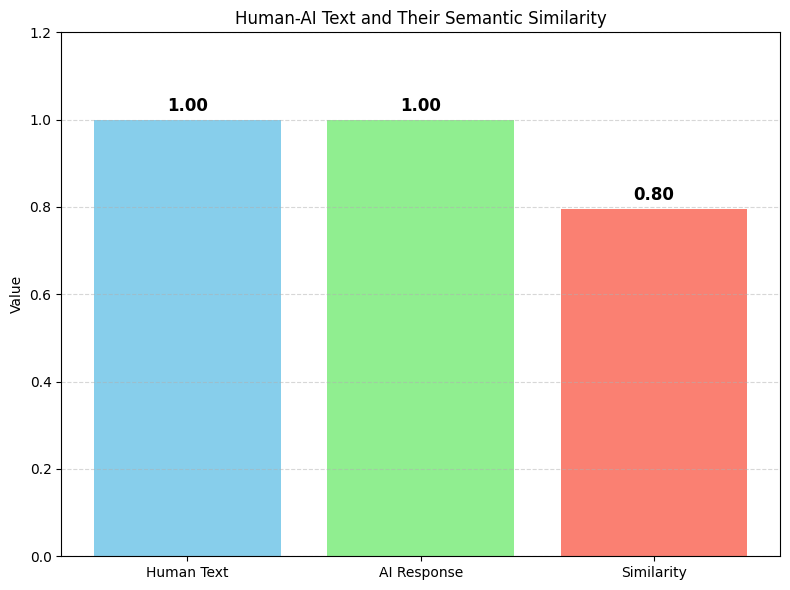

In [ ]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example pair
human_text = "I'm feeling really anxious about my exams and can't sleep."
ai_text = """That totally makes sense—exams can be incredibly stressful. I'm really glad you reached out.

Let’s talk through it a bit. What's been making you most anxious—are you feeling unprepared, overwhelmed, or is it more about pressure to do well?

And for sleep, have you been tossing and turning with racing thoughts, or is it more just a general sense of restlessness? We can definitely figure out some ways to help ease your mind tonigh."""

# Encode texts and compute similarity
embeddings = model.encode([human_text, ai_text], convert_to_tensor=True)
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Values to plot
labels = ['Human Text', 'AI Response', 'Similarity']
values = [1.0, 1.0, similarity_score]  # Set 1.0 for texts (just to show them equally), real info in similarity

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02,
             f"{val:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1.2)
plt.title("Human-AI Text and Their Semantic Similarity")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming the emotion classification model, tokenizer, and labels are loaded in the previous cells
import torch
# Function for Emotion Prediction
def predict_emotion(text):
    # Use the emotion classification model (loaded in cell R9M62p-q_wp)
    inputs = emotion_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        # Access the logits from the correct model
        logits = emotion_model(**inputs).logits
    predicted_class = logits.argmax(dim=-1).item()
    # Use the labels defined for the emotion classification model
    # Assuming emotion_labels is loaded with the correct labels for the emotion model
    return emotion_labels[predicted_class]

# Function for AI vs Human Classification
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Integrated Function for Both Tasks
def classify_text_and_predict_emotion(sentence, label="Text"):
    print(f"{label}: {sentence}")
    ai_human_result = classify_ai_or_human(sentence)
    print(f"AI or Human: {ai_human_result}")

    if ai_human_result == "Human Generated":
        # Ensure emotion_labels are available in this scope
        if 'emotion_labels' in globals():
            emotion_result = predict_emotion(sentence)
            print(f"Predicted Emotion: {emotion_result}")
        else:
            print("Emotion labels not loaded. Cannot predict emotion.")
    else:
        print("Emotion prediction skipped for AI-generated text.")

# Main loop
input_sentence = input("Enter a sentence: ")

# First input (from user)
classify_text_and_predict_emotion(input_sentence, label="Text")

# Now use llama to generate response
# Ensure chat_with_llama is defined in a previous cell
if 'chat_with_llama' in globals():
    ai_text = chat_with_llama(input_sentence)

    # Classify the AI-generated text
    classify_text_and_predict_emotion(ai_text, label="AI_Text")
else:
    print("chat_with_llama function not defined. Cannot generate AI response.")

Enter a sentence: I'm feeling really anxious about my exams and can't sleep.
Text: I'm feeling really anxious about my exams and can't sleep.
AI or Human: Human Generated
Emotion labels not loaded. Cannot predict emotion.


Llama.generate: 53 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =   13312.05 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  126791.52 ms /   200 runs   (  633.96 ms per token,     1.58 tokens per second)
llama_perf_context_print:       total time =  126944.63 ms /   201 tokens


AI_Text: I understand that exams can be a source of anxiety and stress for many people. Here are some suggestions that may help you alleviate your anxiety and promote better sleep:

1. Practice relaxation techniques such as deep breathing, meditation or progressive muscle relaxation before bed. These techniques can help calm your mind and body, reduce stress and promote better sleep.

2. Avoid caffeine, nicotine and alcohol before bedtime. These substances can interfere with sleep and increase anxiety.

3. Limit exposure to screens before bed. The blue light emitted by devices can interfere with your natural sleep-wake cycle, leading to difficulty falling asleep and staying asleep.

4. Write down your thoughts and concerns before bed. This can help you clear your mind and reduce anxiety.

5. Exercise regularly, but not close to bedtime. Exercise can help reduce anxiety and promote better sleep, but it's best to finish
AI or Human: Human Generated
Emotion labels not loaded. Cannot predi

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load the Sentence-BERT model for encoding
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode both texts using the SBERT model
# Assuming 'Text' and 'AI_Text' variables are defined in the environment
embeddings = sbert_model.encode([input_sentence, ai_text], convert_to_tensor=True)

# Compute cosine similarity
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

# Display result
print(f"🧠 Semantic Similarity Score: {similarity_score:.4f}")

🧠 Semantic Similarity Score: 0.7669


In [ ]:
!pip install gradio


In [ ]:
# 1. Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# 2. Install necessary libraries
!pip install gradio sentence-transformers transformers scikit-learn

# 3. Imports
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM

import gradio as gr

# 4. Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Major Project/500.csv', encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

# 5. Train AI vs Human classifier
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)

# 6. Evaluate (optional)
y_pred = ai_human_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# 7. Labels
ai_human_labels = ["Human Generated", "AI Generated"]

# 8. Similarity model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# 9. Load text generator model (DistilGPT2 for lightweight response)
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")
model.eval()

# 10. Function: Generate response
def get_llama_response(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    with torch.no_grad():
        outputs = model.generate(input_ids, max_new_tokens=50)
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded

# 11. Function: Classify text
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# 12. Function: Compute similarity
def compute_similarity(text1, text2):
    emb1 = embedding_model.encode(text1, convert_to_tensor=True)
    emb2 = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(emb1, emb2).item()
    return f"Similarity: {score:.2f}"

# 13. Final integrated function
def classify_text(text):
    label = classify_ai_or_human(text)
    ai_response = get_llama_response(text)
    similarity_score = compute_similarity(text, ai_response)
    return label, ai_response, similarity_score

# 14. Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 AI vs Human Text Classifier")
    with gr.Row():
        with gr.Column():
            input_text = gr.Textbox(lines=4, label="Enter Text Here")
            submit_btn = gr.Button("Analyze")
        with gr.Column():
            label_output = gr.Textbox(label="Classification Result")
            ai_response_output = gr.Textbox(label="Generated AI Response")
            similarity_output = gr.Textbox(label="Semantic Similarity Score")

    submit_btn.click(fn=classify_text,
                     inputs=input_text,
                     outputs=[label_output, ai_response_output, similarity_output])

# 15. Launch the app
demo.launch(share=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        53
           1       0.55      0.62      0.58        47

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a08fd34e2013bcd27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ===============================
# 1. Install Dependencies
# ===============================
!pip install llama-cpp-python
!pip install gradio sentence-transformers transformers scikit-learn pandas

# ===============================
# 2. Import Libraries
# ===============================
import pandas as pd
import torch
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sentence_transformers import SentenceTransformer, util
from llama_cpp import Llama
import gradio as gr

# ===============================
# 3. Load Dataset and Train Classifier
# ===============================
# Load your labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Build text classification pipeline
ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
ai_human_pipeline.fit(X_train, y_train)

# (Optional) Print classification report
print(classification_report(y_test, ai_human_pipeline.predict(X_test)))

# Class labels
ai_human_labels = ["Human Generated", "AI Generated"]

# ===============================
# 4. Load Zephyr GGUF Model (LLaMA.cpp)
# ===============================
llm = Llama(
    model_path="/content/zephyr-7b.q4k.gguf",
    n_ctx=2048,
    n_threads=4
)

# ===============================
# 5. Load Embedding Model for Semantic Similarity
# ===============================
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# ===============================
# 6. Core Helper Functions
# ===============================

# Trim to first complete sentence
def trim_to_first_sentence(text):
    match = re.search(r"(.+?[.!?])", text)
    return match.group(1).strip() if match else text.strip()

# Generate AI response using Zephyr model
def get_llama_response(prompt):
    system_prompt = "You are a helpful and empathetic AI assistant."
    full_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>\n"

    response = llm(full_prompt, max_tokens=150, temperature=0.7, stop=["<|user|>", "<|system|>"])
    return trim_to_first_sentence(response["choices"][0]["text"].strip())

# Predict if input is AI or Human
def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

# Compute cosine similarity between input and AI response
def compute_similarity(text1, text2):
    emb1 = embedding_model.encode(text1, convert_to_tensor=True)
    emb2 = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(emb1, emb2).item()
    return f"Similarity: {score:.2f}"

# Combined function for Gradio
def classify_text(text):
    label = classify_ai_or_human(text)
    ai_response = get_llama_response(text)
    similarity_score = compute_similarity(text, ai_response)
    return label, ai_response, similarity_score

# ===============================
# 7. Gradio GUI Setup
# ===============================
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 Human vs AI Text Classifier using Zephyr-7B")

    with gr.Row():
        with gr.Column():
            input_text = gr.Textbox(lines=4, label="Enter Your Text")
            submit_btn = gr.Button("Analyze")
        with gr.Column():
            label_output = gr.Textbox(label="Classification Result")
            ai_response_output = gr.Textbox(label="AI Response")
            similarity_output = gr.Textbox(label="Semantic Similarity Score")

    submit_btn.click(fn=classify_text,
                     inputs=input_text,
                     outputs=[label_output, ai_response_output, similarity_output])

# ===============================
# 8. Launch App
# ===============================
demo.launch(share=True)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_cou

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        53
           1       0.55      0.62      0.58        47

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



llama_model_loader: - kv  14:                      tokenizer.ggml.scores arr[f32,32000]   = [0.000000, 0.000000, 0.000000, 0.0000...
llama_model_loader: - kv  15:                  tokenizer.ggml.token_type arr[i32,32000]   = [2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
llama_model_loader: - kv  16:                tokenizer.ggml.bos_token_id u32              = 1
llama_model_loader: - kv  17:                tokenizer.ggml.eos_token_id u32              = 2
llama_model_loader: - kv  18:            tokenizer.ggml.unknown_token_id u32              = 0
llama_model_loader: - kv  19:            tokenizer.ggml.padding_token_id u32              = 2
llama_model_loader: - kv  20:               general.quantization_version u32              = 2
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q4_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
print_info: file format = GGUF V2
print_info: file type   = Q4_K - Medium
print_info: file size   = 4.07 GiB (4.83 BPW) 
init_

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://533dbaacb8cd32d23a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# 1. Install Dependencies
!pip install llama-cpp-python
!pip install gradio sentence-transformers transformers scikit-learn pandas

# 2. Imports
import pandas as pd
import torch
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sentence_transformers import SentenceTransformer, util
from llama_cpp import Llama
import gradio as gr

# 3. Load and Train Classifier
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)

print(classification_report(y_test, ai_human_pipeline.predict(X_test)))
ai_human_labels = ["Human Generated", "AI Generated"]

# 4. Load Zephyr GGUF Model
llm = Llama(
    model_path="/content/zephyr-7b.q4k.gguf",
    n_ctx=2048,
    n_threads=4
)

# 5. Load Sentence Embedding Model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# 6. Helper Functions
def trim_to_first_sentence(text):
    match = re.search(r"(.+?[.!?])", text)
    return match.group(1).strip() if match else text.strip()

def get_llama_response(prompt):
    system_prompt = "You are a helpful and empathetic AI assistant."
    full_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>\n"
    response = llm(full_prompt, max_tokens=150, temperature=0.7, stop=["<|user|>", "<|system|>"])
    return trim_to_first_sentence(response["choices"][0]["text"].strip())

def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

def compute_similarity(text1, text2):
    emb1 = embedding_model.encode(text1, convert_to_tensor=True)
    emb2 = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(emb1, emb2).item()
    return f"Similarity: {score:.2f}"

def analyze_and_proceed(text):
    label = classify_ai_or_human(text)
    ai_response = get_llama_response(text)
    similarity = compute_similarity(text, ai_response)
    return gr.update(visible=False), gr.update(visible=True), label, ai_response, similarity

# 7. Two-Page Gradio App
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 Human vs AI Text Classifier using Zephyr-7B")

    # State 1: Input Page
    with gr.Column(visible=True) as input_page:
        user_input = gr.Textbox(lines=4, label="Enter Your Text")
        next_btn = gr.Button("Analyze")

    # State 2: Output Page
    with gr.Column(visible=False) as result_page:
        label_output = gr.Textbox(label="Classification Result")
        ai_response_output = gr.Textbox(label="AI Response")
        similarity_output = gr.Textbox(label="Semantic Similarity Score")
        back_btn = gr.Button("← Go Back")

    # On click of Analyze button
    next_btn.click(fn=analyze_and_proceed,
                   inputs=user_input,
                   outputs=[input_page, result_page, label_output, ai_response_output, similarity_output])

    # Back button resets the view
    back_btn.click(lambda: (gr.update(visible=True), gr.update(visible=False)),
                   inputs=None,
                   outputs=[input_page, result_page])

# 8. Launch
demo.launch(share=True)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_cou

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        53
           1       0.55      0.62      0.58        47

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



init_tokenizer: initializing tokenizer for type 1
load: control token:      2 '</s>' is not marked as EOG
load: control token:      1 '<s>' is not marked as EOG
load: special_eos_id is not in special_eog_ids - the tokenizer config may be incorrect
load: special tokens cache size = 3
load: token to piece cache size = 0.1637 MB
print_info: arch             = llama
print_info: vocab_only       = 0
print_info: n_ctx_train      = 32768
print_info: n_embd           = 4096
print_info: n_layer          = 32
print_info: n_head           = 32
print_info: n_head_kv        = 8
print_info: n_rot            = 128
print_info: n_swa            = 0
print_info: n_swa_pattern    = 1
print_info: n_embd_head_k    = 128
print_info: n_embd_head_v    = 128
print_info: n_gqa            = 4
print_info: n_embd_k_gqa     = 1024
print_info: n_embd_v_gqa     = 1024
print_info: f_norm_eps       = 0.0e+00
print_info: f_norm_rms_eps   = 1.0e-05
print_info: f_clamp_kqv      = 0.0e+00
print_info: f_max_alibi_bias = 0.0e

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2b24ef38c048b9f3dc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ===============================
# 1. Install Dependencies
# ===============================
!pip install llama-cpp-python
!pip install gradio sentence-transformers transformers scikit-learn pandas

# ===============================
# 2. Import Libraries
# ===============================
import pandas as pd
import torch
import re
import threading
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sentence_transformers import SentenceTransformer, util
from llama_cpp import Llama
import gradio as gr

# ===============================
# 3. Load Dataset and Train Classifier
# ===============================
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)

print(classification_report(y_test, ai_human_pipeline.predict(X_test)))

ai_human_labels = ["Human Generated", "AI Generated"]

# ===============================
# 4. Load Zephyr GGUF Model (LLaMA.cpp)
# ===============================
llm = Llama(
    model_path="/content/zephyr-7b.q4k.gguf",
    n_ctx=2048,
    n_threads=4,
    n_gpu_layers=20
)

# ===============================
# 5. Load Embedding Model
# ===============================
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_cache = {}

# ===============================
# 6. Helper Functions
# ===============================
def trim_to_first_sentence(text):
    match = re.search(r"(.+?[.!?])", text)
    return match.group(1).strip() if match else text.strip()

def get_llama_response(prompt):
    system_prompt = "You are a helpful and empathetic AI assistant."
    full_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>\n"
    response = llm(full_prompt, max_tokens=80, temperature=0.7, stop=["<|user|>", "<|system|>"])
    return trim_to_first_sentence(response["choices"][0]["text"].strip())

def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

def compute_similarity(text1, text2):
    if text1 not in embedding_cache:
        embedding_cache[text1] = embedding_model.encode(text1, convert_to_tensor=True)
    if text2 not in embedding_cache:
        embedding_cache[text2] = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(embedding_cache[text1], embedding_cache[text2]).item()
    return f"Similarity: {score:.2f}"

def _generate_response_and_similarity(text, results):
    ai_response = get_llama_response(text)
    similarity = compute_similarity(text, ai_response)
    results["ai_response"] = ai_response
    results["similarity"] = similarity

def analyze_and_proceed(text):
    start_time = time.time()
    label = classify_ai_or_human(text)

    results = {}
    thread = threading.Thread(target=lambda: _generate_response_and_similarity(text, results))
    thread.start()
    thread.join()

    print("Total time:", time.time() - start_time)
    return (
        gr.update(visible=False),  # hide submit
        gr.update(visible=False),  # hide loading
        gr.update(visible=True),   # show result group
        label,
        results["ai_response"],
        results["similarity"],
        gr.update(visible=False)   # ensure loading is hidden
    )

# ===============================
# 7. Gradio GUI (Two Pages + Loading)
# ===============================
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 Human vs AI Text Classifier using Zephyr-7B")

    input_text = gr.Textbox(lines=4, label="Enter Your Text")
    submit_btn = gr.Button("Next →")
    loading = gr.Markdown("⏳ Processing... Please wait...", visible=False)
    result_page = gr.Group(visible=False)

    with result_page:
        label_output = gr.Textbox(label="Classification Result")
        ai_response_output = gr.Textbox(label="AI Response")
        similarity_output = gr.Textbox(label="Semantic Similarity Score")
        back_btn = gr.Button("← Back")

    # When submit button is clicked
    submit_btn.click(
        fn=analyze_and_proceed,
        inputs=input_text,
        outputs=[
            submit_btn,
            loading,
            result_page,
            label_output,
            ai_response_output,
            similarity_output,
            loading
        ],
        show_progress=True
    )

    back_btn.click(
        lambda: (gr.update(visible=True), gr.update(visible=False), gr.update(visible=False)),
        inputs=[],
        outputs=[submit_btn, result_page, loading]
    )

# ===============================
# 8. Launch App
# ===============================
demo.launch(share=True)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_cou

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        53
           1       0.55      0.62      0.58        47

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



load: token to piece cache size = 0.1637 MB
print_info: arch             = llama
print_info: vocab_only       = 0
print_info: n_ctx_train      = 32768
print_info: n_embd           = 4096
print_info: n_layer          = 32
print_info: n_head           = 32
print_info: n_head_kv        = 8
print_info: n_rot            = 128
print_info: n_swa            = 0
print_info: n_swa_pattern    = 1
print_info: n_embd_head_k    = 128
print_info: n_embd_head_v    = 128
print_info: n_gqa            = 4
print_info: n_embd_k_gqa     = 1024
print_info: n_embd_v_gqa     = 1024
print_info: f_norm_eps       = 0.0e+00
print_info: f_norm_rms_eps   = 1.0e-05
print_info: f_clamp_kqv      = 0.0e+00
print_info: f_max_alibi_bias = 0.0e+00
print_info: f_logit_scale    = 0.0e+00
print_info: f_attn_scale     = 0.0e+00
print_info: n_ff             = 14336
print_info: n_expert         = 0
print_info: n_expert_used    = 0
print_info: causal attn      = 1
print_info: pooling type     = 0
print_info: rope type        = 0


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af4bff644a97d37370.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ===============================
# 1. Install Dependencies
# ===============================
!pip install llama-cpp-python
!pip install gradio sentence-transformers transformers scikit-learn pandas

# ===============================
# 2. Import Libraries
# ===============================
import pandas as pd
import torch
import re
import threading
import time
import torch.nn.functional as F
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from llama_cpp import Llama
import gradio as gr

# ===============================
# 3. Load Dataset and Train Classifier
# ===============================
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)

ai_human_labels = ["Human Generated", "AI Generated"]

# ===============================
# 4. Load Zephyr GGUF Model
# ===============================
llm = Llama(
    model_path="/content/zephyr-7b.q4k.gguf",
    n_ctx=2048,
    n_threads=4,
    n_gpu_layers=20
)

# ===============================
# 5. Load Embedding Model
# ===============================
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_cache = {}

# ===============================
# 6. Load Emotion Model
# ===============================
emotion_model_name = "nateraw/bert-base-uncased-emotion"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
emotion_model.eval()
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# ===============================
# 7. Helper Functions
# ===============================
def trim_to_first_sentence(text):
    match = re.search(r"(.+?[.!?])", text)
    return match.group(1).strip() if match else text.strip()

def get_llama_response(prompt):
    system_prompt = "You are a helpful and empathetic AI assistant."
    full_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>\n"
    response = llm(full_prompt, max_tokens=80, temperature=0.7, stop=["<|user|>", "<|system|>"])
    return trim_to_first_sentence(response["choices"][0]["text"].strip())

def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

def compute_similarity(text1, text2):
    if text1 not in embedding_cache:
        embedding_cache[text1] = embedding_model.encode(text1, convert_to_tensor=True)
    if text2 not in embedding_cache:
        embedding_cache[text2] = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(embedding_cache[text1], embedding_cache[text2]).item()
    return f"{score:.2f}"

def predict_emotion(text):
    inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = emotion_model(**inputs)
    probs = F.softmax(outputs.logits, dim=-1)
    top_idx = torch.argmax(probs, dim=1).item()
    top_emotion = emotion_labels[top_idx]
    confidence = probs[0, top_idx].item()
    return f"{top_emotion} ({confidence:.2f})"

# ===============================
# 8. Gradio GUI - 3 Pages
# ===============================
with gr.Blocks() as demo:
    gr.HTML("""
        <style>
            body {
                background-color: #f0f4f8;
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            }
            .gr-button {
                background-color: #4CAF50 !important;
                color: Blues !important;
                border: none;
                padding: 10px 20px;
                margin: 5px;
                border-radius: 10px;
                font-weight: bold;
                cursor: pointer;
            }
            .gr-textbox textarea {
                background-color: #ffffff !important;
                border: 1px solid #ccc !important;
                border-radius: 8px;
                padding: 8px;
            }
        </style>
    """)
    gr.Markdown("## 🤖 Emotion Quality Prediction")

    state_input = gr.State()
    state_label = gr.State()
    state_emotion = gr.State()
    state_response = gr.State()
    state_similarity = gr.State()

    # Page 1 - Input
    with gr.Group(visible=True) as input_page:
        input_text = gr.Textbox(lines=4, label="Enter Your Text")
        next_btn1 = gr.Button("Emotion Classification →")

    # Page 2 - Classification + Emotion
    with gr.Group(visible=False) as result_page_2:
        label_output = gr.Textbox(label="Classification Result", interactive=False)
        emotion_output = gr.Textbox(label="Predicted Emotion", interactive=False)
        next_btn2 = gr.Button("AI Response →")
        back_btn2 = gr.Button("← Back")

    # Page 3 - AI Response + Similarity
    with gr.Group(visible=False) as result_page_3:
        input_display = gr.Textbox(label="Your Input", interactive=False)
        ai_response_output = gr.Textbox(label="AI Response", interactive=False)
        similarity_output = gr.Textbox(label="Semantic Similarity Score", interactive=False)
        back_btn3 = gr.Button("← Back")

    def go_to_page2(text):
        label = classify_ai_or_human(text)
        emotion = predict_emotion(text)
        return (
            gr.update(visible=False),
            gr.update(visible=True),
            text,
            label,
            emotion,
            gr.update(value=label),
            gr.update(value=emotion)
        )

    next_btn1.click(
        fn=go_to_page2,
        inputs=input_text,
        outputs=[
            input_page,
            result_page_2,
            state_input,
            state_label,
            state_emotion,
            label_output,
            emotion_output
        ]
    )

    def go_to_page3(text, _label, _emotion):
        ai_resp = get_llama_response(text)
        similarity = compute_similarity(text, ai_resp)
        return (
            gr.update(visible=False),
            gr.update(visible=True),
            text,
            ai_resp,
            similarity
        )

    next_btn2.click(
        fn=go_to_page3,
        inputs=[state_input, state_label, state_emotion],
        outputs=[result_page_2, result_page_3, input_display, ai_response_output, similarity_output]
    )

    back_btn2.click(
        fn=lambda: (gr.update(visible=True), gr.update(visible=False)),
        inputs=[],
        outputs=[input_page, result_page_2]
    )

    back_btn3.click(
        fn=lambda: (gr.update(visible=True), gr.update(visible=False)),
        inputs=[],
        outputs=[result_page_2, result_page_3]
    )

# ===============================
# 9. Launch App
# ===============================
demo.launch(share=True)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_cou

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0546adc9b257434c34.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ===============================
# 1. Install Dependencies
# ===============================
!pip install llama-cpp-python
!pip install gradio sentence-transformers transformers scikit-learn pandas

# ===============================
# 2. Import Libraries
# ===============================
import pandas as pd
import torch
import re
import torch.nn.functional as F
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from llama_cpp import Llama
import gradio as gr

# ===============================
# 3. Load Dataset and Train Classifier
# ===============================
df = pd.read_csv("/content/drive/MyDrive/Major Project/500.csv", encoding='latin-1')
texts = df["Text"].tolist()
labels = df["Label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

ai_human_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
ai_human_pipeline.fit(X_train, y_train)
ai_human_labels = ["Human Generated", "AI Generated"]

# ===============================
# 4. Load Zephyr GGUF Model
# ===============================
llm = Llama(
    model_path="/content/zephyr-7b.q4k.gguf",
    n_ctx=2048,
    n_threads=4,
    n_gpu_layers=20
)

# ===============================
# 5. Load Embedding Model
# ===============================
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_cache = {}

# ===============================
# 6. Load Emotion Model
# ===============================
emotion_model_name = "nateraw/bert-base-uncased-emotion"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
emotion_model.eval()
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# ===============================
# 7. Helper Functions
# ===============================
def trim_to_first_sentence(text):
    match = re.search(r"(.+?[.!?])", text)
    return match.group(1).strip() if match else text.strip()

def get_llama_response(prompt):
    system_prompt = "You are a helpful and empathetic AI assistant."
    full_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>\n"
    response = llm(full_prompt, max_tokens=80, temperature=0.7, stop=["<|user|>", "<|system|>"])
    return trim_to_first_sentence(response["choices"][0]["text"].strip())

def classify_ai_or_human(text):
    prediction = ai_human_pipeline.predict([text])[0]
    return ai_human_labels[prediction]

def compute_similarity(text1, text2):
    if text1 not in embedding_cache:
        embedding_cache[text1] = embedding_model.encode(text1, convert_to_tensor=True)
    if text2 not in embedding_cache:
        embedding_cache[text2] = embedding_model.encode(text2, convert_to_tensor=True)
    score = util.cos_sim(embedding_cache[text1], embedding_cache[text2]).item()
    return f"{score:.2f}"

def predict_emotion(text):
    inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = emotion_model(**inputs)
    probs = F.softmax(outputs.logits, dim=-1)
    top_idx = torch.argmax(probs, dim=1).item()
    top_emotion = emotion_labels[top_idx]
    confidence = probs[0, top_idx].item()
    return f"{top_emotion} ({confidence:.2f})"

# ===============================
# 8. Gradio GUI - Centered with Colored Pages
# ===============================
with gr.Blocks() as demo:
    gr.HTML("""
        <style>
            body {
                background-color: #ffffff;
                margin: 0;
                padding: 0;
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            }

            .gradio-container {
                display: flex;
                flex-direction: column;
                align-items: center;
                justify-content: center;
                min-height: 100vh;
                padding: 20px;
            }

            .page1 {
                background-color: #f0f4f8;
                padding: 30px;
                border-radius: 20px;
                width: 100%;
                max-width: 700px;
            }

            .page2 {
                background-color: #e6f7ff;
                padding: 30px;
                border-radius: 20px;
                width: 100%;
                max-width: 700px;
            }

            .page3 {
                background-color: #fff3e6;
                padding: 30px;
                border-radius: 20px;
                width: 100%;
                max-width: 700px;
            }

            .gr-button {
                background-color: #4CAF50 !important;
                color: white !important;
                border: none;
                padding: 10px 20px;
                margin: 5px;
                border-radius: 10px;
                font-weight: bold;
                cursor: pointer;
            }

            .gr-textbox textarea {
                background-color: #ffffff !important;
                border: 1px solid #ccc !important;
                border-radius: 8px;
                padding: 8px;
            }
        </style>
        <div class="gradio-container">
    """)

    gr.Markdown("## 🤖 Emotion Quality Prediction")

    state_input = gr.State()
    state_label = gr.State()
    state_emotion = gr.State()
    state_response = gr.State()
    state_similarity = gr.State()

    # Page 1 - Input
    with gr.Group(visible=True, elem_classes=["page1"]) as input_page:
        input_text = gr.Textbox(lines=4, label="Enter Your Text")
        next_btn1 = gr.Button("Emotion Classification →")

    # Page 2 - Classification + Emotion
    with gr.Group(visible=False, elem_classes=["page2"]) as result_page_2:
        label_output = gr.Textbox(label="Classification Result", interactive=False)
        emotion_output = gr.Textbox(label="Predicted Emotion", interactive=False)
        next_btn2 = gr.Button("AI Response →")
        back_btn2 = gr.Button("← Back")

    # Page 3 - AI Response + Similarity
    with gr.Group(visible=False, elem_classes=["page3"]) as result_page_3:
        input_display = gr.Textbox(label="Your Input", interactive=False)
        ai_response_output = gr.Textbox(label="AI Response", interactive=False)
        similarity_output = gr.Textbox(label="Semantic Similarity Score", interactive=False)
        back_btn3 = gr.Button("← Back")

    def go_to_page2(text):
        label = classify_ai_or_human(text)
        emotion = predict_emotion(text)
        return (
            gr.update(visible=False),
            gr.update(visible=True),
            text,
            label,
            emotion,
            gr.update(value=label),
            gr.update(value=emotion)
        )

    next_btn1.click(
        fn=go_to_page2,
        inputs=input_text,
        outputs=[
            input_page,
            result_page_2,
            state_input,
            state_label,
            state_emotion,
            label_output,
            emotion_output
        ]
    )

    def go_to_page3(text, _label, _emotion):
        ai_resp = get_llama_response(text)
        similarity = compute_similarity(text, ai_resp)
        return (
            gr.update(visible=False),
            gr.update(visible=True),
            text,
            ai_resp,
            similarity
        )

    next_btn2.click(
        fn=go_to_page3,
        inputs=[state_input, state_label, state_emotion],
        outputs=[result_page_2, result_page_3, input_display, ai_response_output, similarity_output]
    )

    back_btn2.click(
        fn=lambda: (gr.update(visible=True), gr.update(visible=False)),
        inputs=[],
        outputs=[input_page, result_page_2]
    )

    back_btn3.click(
        fn=lambda: (gr.update(visible=True), gr.update(visible=False)),
        inputs=[],
        outputs=[result_page_2, result_page_3]
    )

    gr.HTML("</div>")  # Close gradio-container div

# ===============================
# 9. Launch App
# ===============================
demo.launch(share=True)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/zephyr-7b.q4k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-alpha
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_cou

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://57a30e481f471c9298.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
